In [8]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

%matplotlib inline

In [9]:
df=pd.read_csv("SMS-Messages2.csv")
df.head()

,Message,Class_Label
0,'Go until jurong point,ham
1,'Ok lar... Joking wif u oni...',ham
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam
3,'U dun say so early hor... U c already then sa...,ham
4,'Nah I don\'t think he goes to usf,ham


In [10]:
df.shape

(200, 2)

In [11]:
df.columns


Index([' Message', 'Class_Label'], dtype='object')

In [12]:
df.rename(columns={' Message': 'Message'}, inplace=True)


In [13]:
#Create the tokens in a seperate column in the dataframe

df['words']=df['Message'].str.strip().str.split('[\W_]+')

In [14]:
df.head()

,Message,Class_Label,words
0,'Go until jurong point,ham,"[, Go, until, jurong, point]"
1,'Ok lar... Joking wif u oni...',ham,"[, Ok, lar, Joking, wif, u, oni, ]"
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam,"[, Free, entry, in, 2, a, wkly, comp, to, win,..."
3,'U dun say so early hor... U c already then sa...,ham,"[, U, dun, say, so, early, hor, U, c, already,..."
4,'Nah I don\'t think he goes to usf,ham,"[, Nah, I, don, t, think, he, goes, to, usf]"


The code `df['words'] = df['Message'].str.strip().str.split('[\W_]+')` is performing the following actions:

1. `df['Message'].str.strip()`: This part takes the 'Message' column of the DataFrame `df` and applies the `strip()` method to remove any leading or trailing whitespace from each string in the column. The `str.strip()` function operates on each element of the 'Message' column, treating them as strings.

2. `.str.split('[\W_]+')`: This part further processes each string in the 'Message' column after stripping whitespace. It uses the `str.split()` method to split each string into a list of substrings based on the provided regular expression pattern `[`\W_]+`. Here's what this regular expression pattern does:
   - `[\W_]`: Matches any non-word character or underscore.
   - `+`: Matches one or more occurrences of the preceding character or group (in this case, non-word characters or underscores).
   Therefore, the string is split into tokens wherever one or more non-word characters or underscores occur.

3. Finally, the result of the split operation is assigned to a new column named 'words' in the DataFrame `df`. This new column contains lists of tokens obtained from splitting each 'Message' string.

In summary, this line of code is splitting the text in the 'Message' column into tokens based on non-word characters (including underscores) and storing the resulting lists of tokens in a new column called 'words' in the DataFrame `df`.

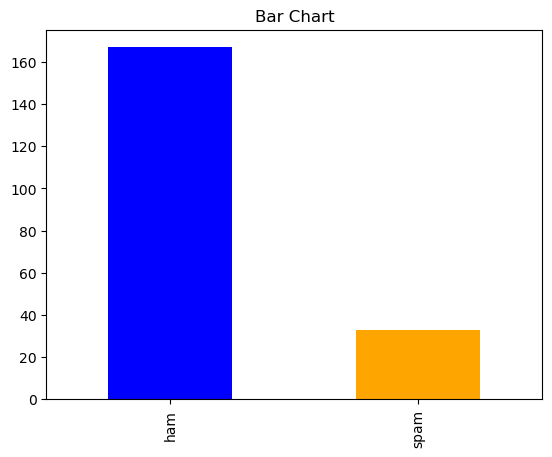

In [15]:
## Explore the data

count_classes=pd.value_counts(df['Class_Label'],sort=True)
count_classes.plot(kind='bar',color=['blue','orange'])
plt.title("Bar Chart")
plt.show()

In [16]:
df['length']=df['Message'].apply(len)

In [17]:
df

,Message,Class_Label,words,length
0,'Go until jurong point,ham,"[, Go, until, jurong, point]",22
1,'Ok lar... Joking wif u oni...',ham,"[, Ok, lar, Joking, wif, u, oni, ]",31
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam,"[, Free, entry, in, 2, a, wkly, comp, to, win,...",159
3,'U dun say so early hor... U c already then sa...,ham,"[, U, dun, say, so, early, hor, U, c, already,...",51
4,'Nah I don\'t think he goes to usf,ham,"[, Nah, I, don, t, think, he, goes, to, usf]",34
...,...,...,...,...
195,'How are you doing? Hope you\'ve settled in fo...,ham,"[, How, are, you, doing, Hope, you, ve, settle...",95
196,'Gud mrng dear hav a nice day',ham,"[, Gud, mrng, dear, hav, a, nice, day, ]",30
197,'Did u got that persons story',ham,"[, Did, u, got, that, persons, story, ]",30
198,'is your hamster dead? Hey so tmr i meet you a...,ham,"[, is, your, hamster, dead, Hey, so, tmr, i, m...",66


In [19]:
## Create Bag of Words using Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')

X=cv.fit_transform(df['Message'])
X.shape

(200, 841)

In [20]:
df.shape

(200, 4)

In [21]:
## One hot encoding for target Variable

Y=df['Class_Label'].map({'spam':1,'ham':0})

In [22]:
Y

0      0
1      0
2      1
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: Class_Label, Length: 200, dtype: int64

In [23]:
## Create train and Test Data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=4)

In [25]:
print(x_train.shape)
print(x_test.shape)

(150, 841)
(50, 841)


In [27]:
## Build a Naive Bayesian Model

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [29]:
mdl=MultinomialNB(alpha=0.2)
mdl.fit(x_train,y_train)
y_pred=mdl.predict(x_test)

accuracy_score(y_pred,y_test)

0.9

In [31]:
test_df=pd.DataFrame(y_test)
print(test_df.head(3))

test_df['Prediction']=y_pred
test_df.head

     Class_Label
11             1
99             0
128            0


<bound method NDFrame.head of      Class_Label  Prediction
11             1           1
99             0           1
128            0           0
175            0           0
1              0           0
111            0           1
90             0           0
177            0           0
88             0           0
187            0           0
61             0           0
199            0           0
191            1           1
123            1           1
184            0           0
188            1           1
33             0           0
171            0           0
138            0           0
84             0           0
81             0           0
102            0           0
147            1           1
34             1           1
47             0           0
124            0           0
112            0           0
6              0           0
14             0           0
190            0           0
80             0           0
18             0           0
167          

In [33]:
test_df.head(2)

,Class_Label,Prediction
11,1,1
99,0,1


In [34]:
## Confusion matrix for naive bayes

pd.crosstab(test_df['Class_Label'],test_df['Prediction'])

Prediction,0,1
Class_Label,,
0,36,5
1,0,9


In [35]:
## Build SVM Model

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [37]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

accuracy_score(y_pred,y_test)

0.84

In [38]:
svc=SVC(kernel='sigmoid',gamma=1.0)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

accuracy_score(y_pred,y_test)

0.96

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[41,  0],
       [ 2,  7]], dtype=int64)

In [41]:
test_df=pd.DataFrame(y_test)

In [42]:
test_df['Prediction']=y_pred
test_df.head(4)

,Class_Label,Prediction
11,1,0
99,0,0
128,0,0
175,0,0


In [43]:
pd.crosstab(test_df.Class_Label,test_df.Prediction)   

Prediction,0,1
Class_Label,,
0,41,0
1,2,7


#### ability to cover Spam=1 is less here compared to Naive Bayes

In [44]:
## Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier


In [45]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

accuracy_score(y_test,y_pred)

0.86

In [46]:
rf=RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

accuracy_score(y_test,y_pred)

0.82

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[41,  0],
       [ 9,  0]], dtype=int64)

In [48]:
test_df=pd.DataFrame(y_test)
test_df['prediction']=y_pred

In [49]:
pd.crosstab(test_df.Class_Label,test_df.prediction)

prediction,0
Class_Label,
0,41
1,9


In [50]:
## Naive Bayes is best model here
